In [1]:
from torch.utils.data import Dataset
from PIL import Image
import os
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
if os.path.isfile('split_file.csv') is False:
    with open('data/land_cover_representation/metadata.csv') as f:
        metadata = pd.read_csv(f)
    metadata = metadata[metadata['split_str'] == 'train']

    # # Shuffle the rows
    # metadata = metadata.sample(frac=1).reset_index(drop=True)

print(len(metadata))

244471


In [3]:
class LandClassDataset(Dataset):
    def __init__(self, root, split='train', transform=None):
        self.transform = transform

        with open(os.path.join(root, 'metadata.csv')) as f:
            metadata = pd.read_csv(f)
        metadata = metadata[metadata['split_str'] == split]

        self.images = []
        for _, row in metadata.iterrows():
            img_path = os.path.join(root, row['file_name'])
            if os.path.isfile(img_path):
                self.images.append(img_path)
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        image_raw = np.load(img_name)
        image = Image.fromarray(image_raw[:, :, :3])
        label = st.mode(image_raw[:, :, 4]).mode[0]

        if self.transform:
            image = self.transform(image)
    
        return image, label

In [4]:
import torchvision.transforms as T

transform = T.Compose([
    T.Resize((512, 512)),
    T.ToTensor()
])

dataset = LandClassDataset('data/land_cover_representation', transform=transform)

(tensor([[[0.6824, 0.6824, 0.6824,  ..., 0.7294, 0.7294, 0.7294],
         [0.6824, 0.6824, 0.6824,  ..., 0.7294, 0.7294, 0.7294],
         [0.6824, 0.6824, 0.6824,  ..., 0.7294, 0.7294, 0.7294],
         ...,
         [0.5373, 0.5373, 0.5373,  ..., 0.7255, 0.7255, 0.7255],
         [0.5373, 0.5373, 0.5373,  ..., 0.7255, 0.7255, 0.7255],
         [0.5373, 0.5373, 0.5373,  ..., 0.7255, 0.7255, 0.7255]],

        [[0.6471, 0.6471, 0.6471,  ..., 0.6941, 0.6941, 0.6941],
         [0.6471, 0.6471, 0.6471,  ..., 0.6941, 0.6941, 0.6941],
         [0.6471, 0.6471, 0.6471,  ..., 0.6941, 0.6941, 0.6941],
         ...,
         [0.4745, 0.4745, 0.4745,  ..., 0.6824, 0.6824, 0.6824],
         [0.4745, 0.4745, 0.4745,  ..., 0.6824, 0.6824, 0.6824],
         [0.4745, 0.4745, 0.4745,  ..., 0.6824, 0.6824, 0.6824]],

        [[0.5647, 0.5647, 0.5647,  ..., 0.6353, 0.6353, 0.6353],
         [0.5647, 0.5647, 0.5647,  ..., 0.6353, 0.6353, 0.6353],
         [0.5647, 0.5647, 0.5647,  ..., 0.6353, 0.6353, 0

TypeError: Invalid shape (3, 512, 512) for image data

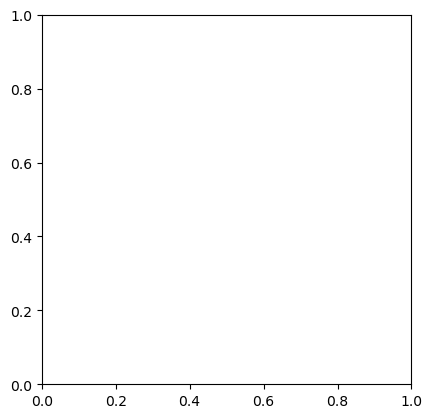

In [13]:
print(dataset[0])
print(type(dataset[0][0]))
plt.imshow(dataset[0][0])


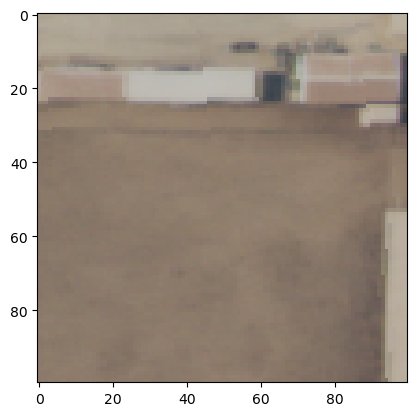

In [6]:
import numpy as np
import matplotlib.pyplot as plt

tile = np.load('data/land_cover_representation/tiles/0anchor.npy')
tile[:, :, 4]
plt.imshow(tile[:, :, :3])

61


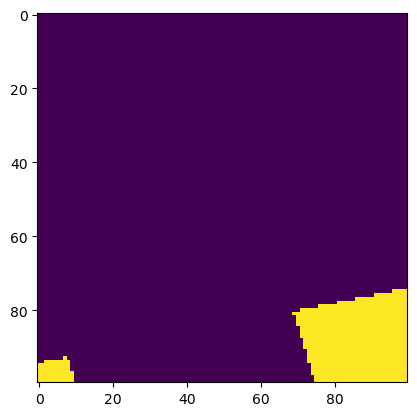

In [7]:
from scipy import stats as st

plt.imshow(tile[:, :, 4])
print(st.mode(tile[:, :, 4]).mode[0])